<a href="https://colab.research.google.com/github/Bhargavi-Singamsetty/DLT-lab/blob/main/RegularizationMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import reuters

In [5]:
(train_X, train_Y), (test_X, test_Y) = reuters.load_data(num_words=10000)

In [6]:
import numpy as np
from keras.utils import to_categorical

def OneHotEncoding_fn(ReutersData, dimension=10000):
    # 8982 x 10k matrix of zeros
    OneHotEncoded_Data = np.zeros((len(ReutersData), dimension))
    for i, sequence in enumerate(ReutersData):
        #Selectively make indices as 1 based on availability of word in the review.
        OneHotEncoded_Data[i, sequence] = 1.
    return OneHotEncoded_Data

x_train = OneHotEncoding_fn(train_X)
x_test = OneHotEncoding_fn(test_X)

y_train = to_categorical(train_Y)
y_test = to_categorical(test_Y)

In [8]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
#model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01), activation='relu', input_shape=(10000,)))

#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
#model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01), activation='relu'))

model.add(layers.Dense(46, activation='softmax'))

In [9]:
from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:800]
X_train_without_val = x_train[800:]
y_validation = y_train[:800]
y_train_without_val = y_train[800:]


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001, rho=0.9),
             loss=losses.categorical_crossentropy,
             metrics=[metrics.categorical_accuracy])

history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))

Epoch 1/25
16/16 [==============================] - 2s 90ms/step - loss: 7.0278 - categorical_accuracy: 0.4879 - val_loss: 3.6094 - val_categorical_accuracy: 0.5663
Epoch 2/25
16/16 [==============================] - 1s 78ms/step - loss: 3.3188 - categorical_accuracy: 0.5770 - val_loss: 3.0730 - val_categorical_accuracy: 0.5713
Epoch 3/25
16/16 [==============================] - 2s 102ms/step - loss: 3.0116 - categorical_accuracy: 0.6076 - val_loss: 2.8644 - val_categorical_accuracy: 0.6313
Epoch 4/25
16/16 [==============================] - 1s 84ms/step - loss: 2.8287 - categorical_accuracy: 0.6314 - val_loss: 2.7065 - val_categorical_accuracy: 0.6612
Epoch 5/25
16/16 [==============================] - 1s 63ms/step - loss: 2.6870 - categorical_accuracy: 0.6498 - val_loss: 2.6286 - val_categorical_accuracy: 0.6600
Epoch 6/25
16/16 [==============================] - 1s 62ms/step - loss: 2.5758 - categorical_accuracy: 0.6634 - val_loss: 2.4918 - val_categorical_accuracy: 0.6725
Epoch 7/2

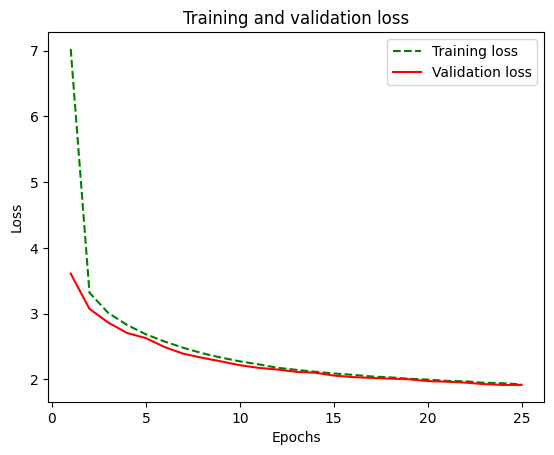

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

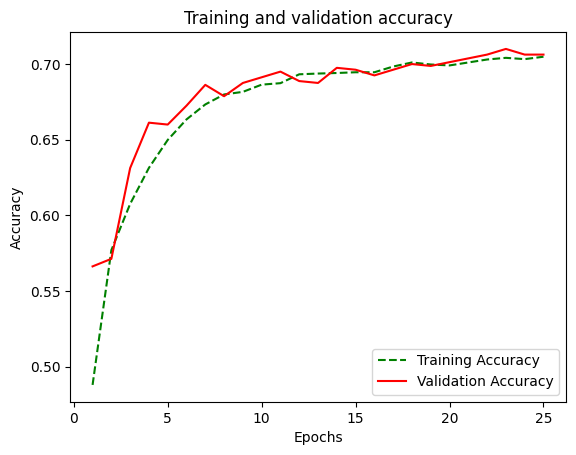

In [11]:
plt.clf()
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
plt.plot(epochs, acc_values, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()